<div align=center>

<font size=5>
    In the Name of God
<font/>
<br/>
<br/>
<font>
    Sharif University of Technology - Departmenet of Electrical Engineering
</font>
<br/>
<font>
    Introducing with Machine Learing - Dr. S. Amini
</font>
<br/>
<br/>
Spring 2023

</div>

<hr/>
<div align=center>
<font size=6>
    Neural Networks Practical Assignment
    
    Question 2
</font>
<br/>		
<font size=4>
<br/>
</div>

# Personal Data

In [ ]:
# Set your student number
student_number = 99109658
Name = 'Navid'
Last_Name = 'Bagheri'

# Rules
- You are not allowed to add or remove cells. You **must use the provided space to write your code**. If you don't follow this rule, **your Practical Assignment won't be graded**.  

- Collaboration and using the internet is allowed, but your code **must be written by yourself**. **Copying code** from each other or from available resources will result in a **zero score for the assignment**.

- In this question, you are allowed to use `torch.optim`, `torch.nn` or any other submodule you need.
- You **are not allowed** to use the models already implemented or the pretrained models in torch. 

In [1]:
!pip install numpy
!pip install matplotlib
!pip install torchvision
!pip install torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Importing Libraries

In [2]:
import torch
from torchvision.datasets import FashionMNIST
from torchvision import transforms
from torch.utils.data import DataLoader

import numpy as np
from matplotlib import pyplot as plt
from typing import Dict

## Datasets and Dataloaders

You should load the train and test set of the `CIFAR10` dataset and apply the desired transforms on it. Then, you should create the loaders for these `test` and `train` sets.
- **Hint:** You can use `torchvision.datasets` to easily load the CIFAR10 dataset.

In [3]:
## FILL HERE
from torchvision.datasets import CIFAR10

trainset = CIFAR10(root='.', train=True, download=True, transform=transforms.ToTensor())
testset = CIFAR10(root='.', train=False, download=True, transform=transforms.ToTensor())
trainloader = DataLoader(trainset, 5, shuffle=True)
testloader = DataLoader(testset, 5, shuffle=True)

# print(len(trainloader))

Files already downloaded and verified
Files already downloaded and verified


## Visualization

Visualize 1 random image from each class


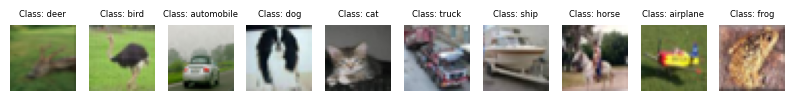

In [4]:
## FILL HERE

num_classes = 10

random_images = []
classes = []
for i in range(num_classes):
  a = np.random.randint(40000)
  while trainset[a][1] in classes:
    a = a+1
  random_images.append(a)
  classes.append(trainset[a][1])

plot_number = 1

plt.figure(figsize=(10,10))
for i in (random_images):
  data, label = trainset[i]
  plt.subplot(1,10,plot_number)
  plot_number = plot_number+1
  plt.imshow(np.transpose(data, (1, 2, 0)))
  plt.title(f'Class: {trainset.classes[label]}',fontsize = 6)
  plt.axis('off')

## Defining a Convolutional Neural Network

In this section, you should define a class called `Net` which represents the model for your convolutional neural network.
- **Hint:** You can use `torch.nn` to add the required layers to your model.

In [5]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        ## FILL HERE
        self.conv1 = nn.Conv2d(3,32,2)
        self.pool = nn.MaxPool2d(3, 3)
        self.conv2 = nn.Conv2d(32,64,2)
        self.conv3 = nn.Conv2d(64,64,2)
        self.conv4 = nn.Conv2d(64,128,2) ##
        self.fc1 = nn.Linear(64*2,64)
        self.fc2 = nn.Linear(64,10)

    def forward(self, x):
        ## FILL HERE
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))

        x = torch.flatten(x,1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

net = Net()

## Define a Loss function and optimizer

In this section, you simply define your loss function and optimizer.
- **Hint:** You can use `torch.optim` and implemented loss functions in torch.

In [6]:
## FILL HERE
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

## Training the model

You should train your model for multiple epochs. You are free to choose the number of epochs. However, you should reach an acceptable accuracy at the end.

In [7]:
epoch_nums = 20  ## Number of epochs 
for epoch in range(epoch_nums):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        ## FILL HERE
        ## You should train the model and also print the running loss for each batch
        inputs, labels = data
        outputs = net(inputs)
        loss = loss_function(outputs,labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss = running_loss + loss.item()

        if i % 100 == 99:
          print(f'epoch number: [{epoch+1}] batch number: [{i+1}] loss: {running_loss / 100:.3f}')

print('Finished Training')

epoch number: [1] batch number: [100] loss: 2.310
epoch number: [1] batch number: [200] loss: 4.616
epoch number: [1] batch number: [300] loss: 6.918
epoch number: [1] batch number: [400] loss: 9.223
epoch number: [1] batch number: [500] loss: 11.526
epoch number: [1] batch number: [600] loss: 13.830
epoch number: [1] batch number: [700] loss: 16.133
epoch number: [1] batch number: [800] loss: 18.436
epoch number: [1] batch number: [900] loss: 20.739
epoch number: [1] batch number: [1000] loss: 23.040
epoch number: [1] batch number: [1100] loss: 25.343
epoch number: [1] batch number: [1200] loss: 27.642
epoch number: [1] batch number: [1300] loss: 29.943
epoch number: [1] batch number: [1400] loss: 32.245
epoch number: [1] batch number: [1500] loss: 34.547
epoch number: [1] batch number: [1600] loss: 36.849
epoch number: [1] batch number: [1700] loss: 39.150
epoch number: [1] batch number: [1800] loss: 41.449
epoch number: [1] batch number: [1900] loss: 43.751
epoch number: [1] batch n

## Test the network on the test data

In the following section, you should test your network and calculate the accuracy of your model on the test dataset.

In [8]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        ## FILL HERE
        inputs, labels = data
        outputs = net(inputs)
        _, predicted = torch.max(outputs, 1)
        total = total + labels.size(0)
        correct = correct + (predicted == labels).sum().item()
print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 69 %


Here, we also calculate the model performance for each class as well.

In [9]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        ## FILL HERE
        inputs, labels = data
        outputs = net(inputs)
        _, predicted = torch.max(outputs, 1)

        for label, predicted in zip(labels, predicted):
            if label == predicted:
                correct_pred[classes[label]] = correct_pred[classes[label]] + 1
            total_pred[classes[label]] = total_pred[classes[label]] + 1

# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {trainset.classes[classname]:13s} is {accuracy:.1f} %')

Accuracy for class: deer          is 67.6 %
Accuracy for class: bird          is 78.2 %
Accuracy for class: automobile    is 60.5 %
Accuracy for class: dog           is 48.9 %
Accuracy for class: cat           is 77.3 %
Accuracy for class: truck         is 58.3 %
Accuracy for class: ship          is 77.9 %
Accuracy for class: horse         is 63.1 %
Accuracy for class: airplane      is 81.8 %
Accuracy for class: frog          is 79.9 %
